In [29]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from kneed import KneeLocator as kn 
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('weather_dataset.csv')

In [3]:
df.head()

,Temperature (°C),Humidity (%),Wind Speed (km/h),Precipitation (mm),Pressure (hPa),Cloud Cover (%)
0,-3.121339,65.591175,55.964033,17.783636,1031.630761,81.796702
1,1.068098,80.996695,15.524025,35.952295,996.714400,83.213418
2,-2.769338,90.141251,18.192813,14.856086,987.733188,50.746773
3,-1.604484,47.366540,86.178562,28.320232,1004.823551,0.638587
4,2.829283,85.700584,94.611546,23.802520,1000.106729,28.703813


In [4]:
df.tail()

,Temperature (°C),Humidity (%),Wind Speed (km/h),Precipitation (mm),Pressure (hPa),Cloud Cover (%)
95,-3.174630,82.042209,8.279867,43.683856,1037.807173,26.899340
96,4.027493,56.263107,60.315211,49.204173,989.020891,79.755910
97,1.182011,61.951222,24.534911,38.413671,1003.458320,31.036196
98,23.477583,55.261020,38.929561,20.888339,1032.045578,45.522015
99,-8.491040,52.061045,28.869374,21.067850,991.253193,1.162054


In [5]:
df.describe()

,Temperature (°C),Humidity (%),Wind Speed (km/h),Precipitation (mm),Pressure (hPa),Cloud Cover (%)
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,11.907121,60.364605,44.577065,27.038184,1016.592154,51.211275
std,12.861701,22.762158,28.974903,14.818234,20.943099,30.223707
min,-8.491040,20.370562,1.099583,1.063471,981.251175,0.638587
25%,0.793721,39.692971,19.922025,14.864609,996.199486,26.669595
50%,11.020759,60.323348,40.907291,28.954397,1019.080627,52.372656
75%,23.784380,78.936679,66.579879,39.947070,1036.031397,77.053602
max,34.548210,99.749940,98.440218,49.896706,1049.643548,99.712450


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Temperature (°C)    100 non-null    float64
 1   Humidity (%)        100 non-null    float64
 2   Wind Speed (km/h)   100 non-null    float64
 3   Precipitation (mm)  100 non-null    float64
 4   Pressure (hPa)      100 non-null    float64
 5   Cloud Cover (%)     100 non-null    float64
dtypes: float64(6)
memory usage: 4.8 KB


In [7]:
df.columns

Index(['Temperature (°C)', 'Humidity (%)', 'Wind Speed (km/h)',
       'Precipitation (mm)', 'Pressure (hPa)', 'Cloud Cover (%)'],
      dtype='object')

In [8]:
df.corr()

,Temperature (°C),Humidity (%),Wind Speed (km/h),Precipitation (mm),Pressure (hPa),Cloud Cover (%)
Temperature (°C),1.000000,0.120998,0.064404,-0.101643,0.105068,0.076855
Humidity (%),0.120998,1.000000,-0.078453,-0.062211,0.041149,0.229048
Wind Speed (km/h),0.064404,-0.078453,1.000000,0.180373,-0.051158,-0.063052
Precipitation (mm),-0.101643,-0.062211,0.180373,1.000000,-0.033397,0.027618
Pressure (hPa),0.105068,0.041149,-0.051158,-0.033397,1.000000,-0.026444
Cloud Cover (%),0.076855,0.229048,-0.063052,0.027618,-0.026444,1.000000


In [9]:
df.shape

(100, 6)

In [14]:
df.rename(columns={'Temperature (°C)': 'Temp', 'Humidity (%)': 'hum', 'Wind Speed (km/h)': 'wind', 'Precipitation (mm)': 'precipit', 'Pressure (hPa)': 'presure', 'Cloud Cover (%)':'cloud'}, inplace=True)

In [15]:
df

,Temp,hum,wind,precipit,presure,cloud
0,-3.121339,65.591175,55.964033,17.783636,1031.630761,81.796702
1,1.068098,80.996695,15.524025,35.952295,996.714400,83.213418
2,-2.769338,90.141251,18.192813,14.856086,987.733188,50.746773
3,-1.604484,47.366540,86.178562,28.320232,1004.823551,0.638587
4,2.829283,85.700584,94.611546,23.802520,1000.106729,28.703813
...,...,...,...,...,...,...
95,-3.174630,82.042209,8.279867,43.683856,1037.807173,26.899340
96,4.027493,56.263107,60.315211,49.204173,989.020891,79.755910
97,1.182011,61.951222,24.534911,38.413671,1003.458320,31.036196
98,23.477583,55.261020,38.929561,20.888339,1032.045578,45.522015


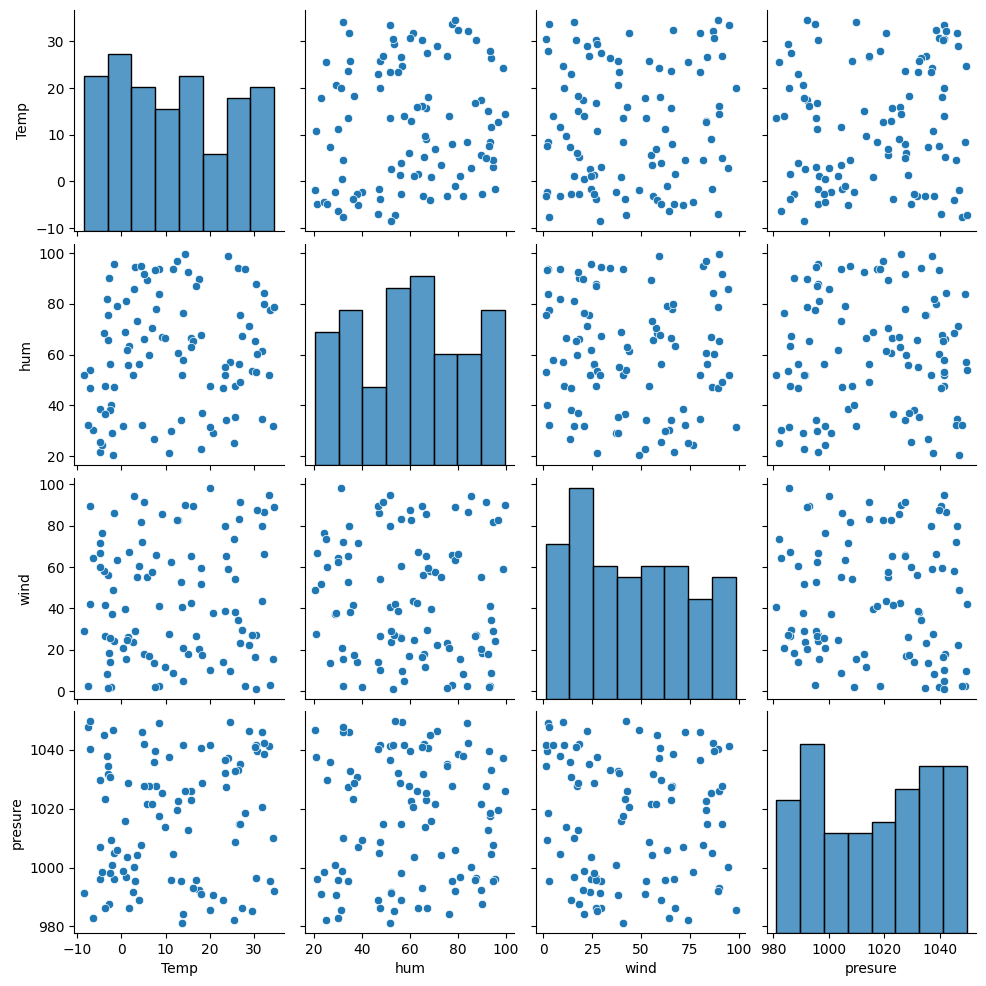

In [17]:
sns.pairplot(df[['Temp', 'hum', 'wind', 'presure']])

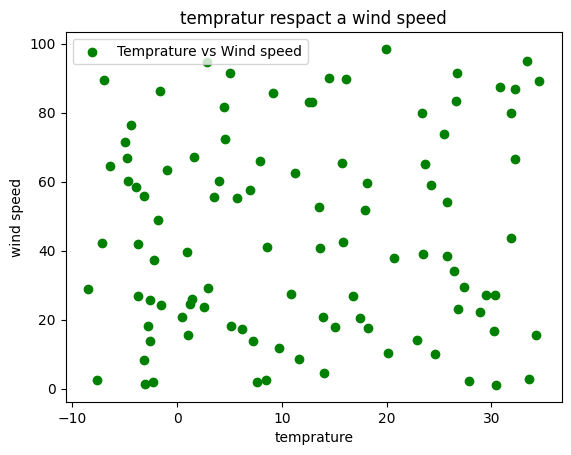

In [19]:
plt.scatter(df.Temp, df.wind, color='green', marker='o', label='Temprature vs Wind speed')

plt.xlabel('temprature')
plt.ylabel('wind speed')
plt.title('tempratur respact a wind speed')
plt.legend()
plt.show()

# Preprocessing data

In [20]:
df.isnull().sum()

Temp        0
hum         0
wind        0
precipit    0
presure     0
cloud       0
dtype: int64

In [21]:
scalar = StandardScaler()

In [25]:
df['Temp'] = scalar.fit_transform(df[['Temp']])
df['hum'] = scalar.fit_transform(df[['hum']]) 
df['wind'] = scalar.fit_transform(df[['wind']])  
df['precipit'] = scalar.fit_transform(df[['precipit']])   
df['presure'] = scalar.fit_transform(df[['presure']])    
df['cloud'] = scalar.fit_transform(df[['cloud']])    

In [26]:
df

,Temp,hum,wind,precipit,presure,cloud
0,-1.174353,0.230773,0.394974,-0.627684,0.721687,1.017066
1,-0.846982,0.910987,-1.007748,0.604594,-0.953913,1.064177
2,-1.146847,1.314755,-0.915177,-0.826244,-1.384912,-0.015446
3,-1.055823,-0.573915,1.443010,0.086954,-0.564763,-1.681708
4,-0.709360,1.118682,1.735521,-0.219457,-0.791119,-0.748447
...,...,...,...,...,...,...
95,-1.178517,0.957151,-1.259023,1.128983,1.018087,-0.808452
96,-0.615729,-0.181097,0.545901,1.503395,-1.323117,0.949203
97,-0.838081,0.070055,-0.695192,0.771536,-0.630279,-0.670888
98,0.904138,-0.225343,-0.195892,-0.417110,0.741594,-0.189187


In [27]:
df.describe()

,Temp,hum,wind,precipit,presure,cloud
count,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
mean,-3.330669e-17,-2.892131e-16,2.442491e-17,-4.463097e-16,-2.782219e-15,-2.042810e-16
std,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00
min,-1.593951e+00,-1.765893e+00,-1.508081e+00,-1.761719e+00,-1.695977e+00,-1.681708e+00
25%,-8.684223e-01,-9.127330e-01,-8.551969e-01,-8.256654e-01,-9.786232e-01,-8.160917e-01
50%,-6.926202e-02,-1.821655e-03,-1.272916e-01,1.299660e-01,1.194193e-01,3.861973e-02
75%,9.281116e-01,8.200293e-01,7.632005e-01,8.755374e-01,9.328694e-01,8.593425e-01
max,1.769218e+00,1.739016e+00,1.868324e+00,1.550366e+00,1.586102e+00,1.612824e+00


# Elbo methods

In [31]:
wcss = []
cluster_range = range(1, 15)

for k in cluster_range: 
    Kmean = KMeans(n_clusters=k, random_state = 42)
    Kmean.fit(df[['Temp', 'hum']])
    wcss.append(Kmean.inertia_)

In [32]:
wcss

[199.99999999999997,
 122.469869495307,
 68.06693845059603,
 48.03064743591886,
 37.60635883009608,
 28.932401383933982,
 25.54070063988007,
 22.66221748593248,
 17.642409218053825,
 16.42318015573118,
 13.481768963248388,
 12.294898368243896,
 10.889406494778193,
 10.209643284144098]

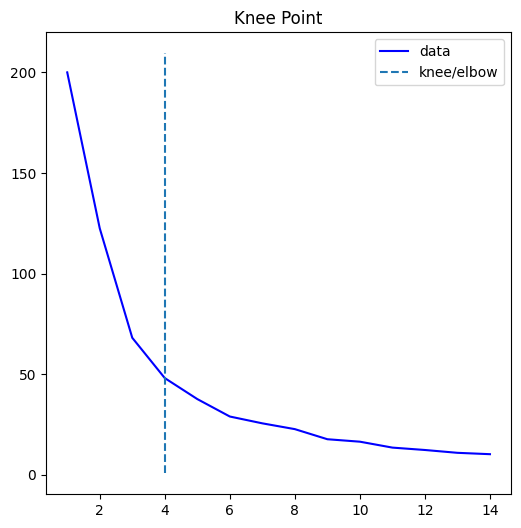

In [33]:
kl = kn(cluster_range, wcss, curve='convex', direction='decreasing')
kl.plot_knee()


In [34]:
kl.knee

4

In [35]:
kmeans = KMeans(n_clusters=4)

In [36]:
df['cluster'] = kmeans.fit_predict(df[['Temp', 'hum']])

In [37]:
df.head()

,Temp,hum,wind,precipit,presure,cloud,cluster
0,-1.174353,0.230773,0.394974,-0.627684,0.721687,1.017066,0
1,-0.846982,0.910987,-1.007748,0.604594,-0.953913,1.064177,0
2,-1.146847,1.314755,-0.915177,-0.826244,-1.384912,-0.015446,2
3,-1.055823,-0.573915,1.443010,0.086954,-0.564763,-1.681708,3
4,-0.709360,1.118682,1.735521,-0.219457,-0.791119,-0.748447,2


# Calculate centroid value.

In [38]:
Centroid = kmeans.cluster_centers_

In [39]:
Centroid

array([[-0.80998446,  0.21712503],
       [ 1.06468414, -0.20009581],
       [-0.07505822,  1.35854195],
       [-0.90155944, -1.24298488]])

In [40]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1] 
df2 = df[df.cluster==2]  
df3 = df[df.cluster==3]   

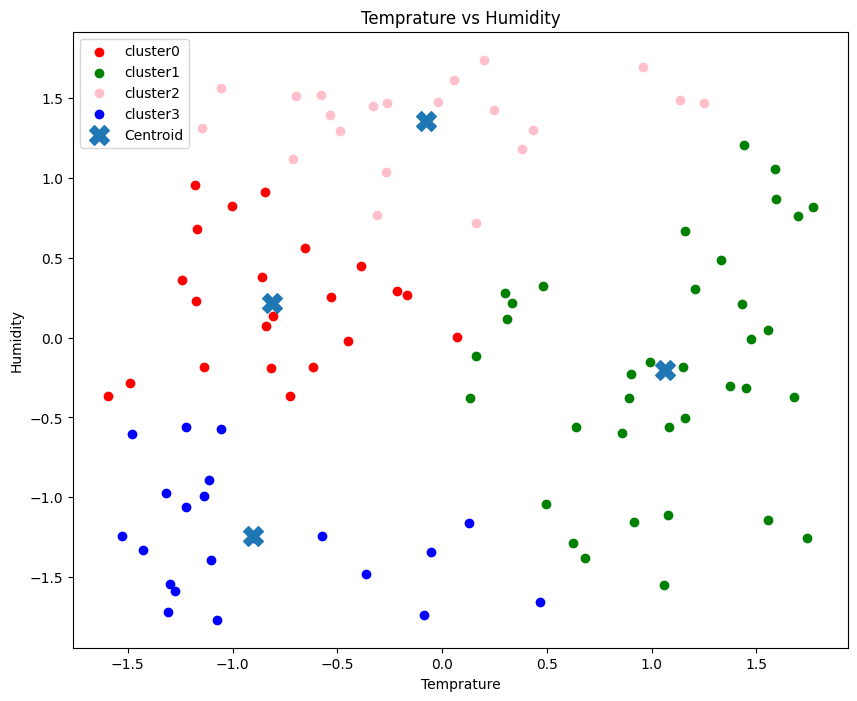

In [48]:
plt.figure(figsize=(10, 8))
plt.scatter(df0.Temp, df0.hum, color='red', marker='o', label='cluster0')
plt.scatter(df1.Temp, df1.hum, color='green', marker='o', label='cluster1') 
plt.scatter(df2.Temp, df2.hum, color='pink', marker='o', label='cluster2')  
plt.scatter(df3.Temp, df3.hum, color='blue', marker='o', label='cluster3')  

plt.scatter(Centroid[:,0], Centroid[:,1], s=200, marker='X', cmap='red', label='Centroid')

plt.xlabel('Temprature')
plt.ylabel('Humidity')
plt.title('Temprature vs Humidity')
plt.legend()